## **1. Patent Data Retrieval**

In [1]:
import requests

def get_patent_data(patent_number):
    url = f"https://api.patentsview.org/patents/query?q={{\"patent_number\":\"{patent_number}\"}}"
    response = requests.get(url)
    return response.json()

patent_data = get_patent_data("US1234567")

### ***Description***: This function retrieves detailed information about a specific patent using the PatentsView API. It sends a request with a given patent number and returns the JSON response containing data such as the patent's title, inventors, assignees, and abstract.






# **2. Patent Text Scraping**

In [15]:
from bs4 import BeautifulSoup
import requests
from sklearn.feature_extraction.text import TfidfVectorizer

def scrape_patent(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Assuming the main text is within a div with class 'description'
        patent_text = soup.find('div', class_='description')
        if patent_text:
            return patent_text.text
        else:
            return "Description not found"
    else:
        return "Failed to retrieve patent text"

# URLs of active US patents
urls = [
    "https://patents.google.com/patent/US10243207B2/en",  # Nanostructured battery active materials
    "https://patents.google.com/patent/US8071571B2/en",  # Orlistat compositions
    "https://patents.google.com/patent/US4605822A/en"    # Active equalization circuit
]

# Scraping and storing patent texts
patent_texts = [scrape_patent(url) for url in urls]

# Vectorizing using TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(patent_texts)

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Print the first few lines of each patent text
for index, text in enumerate(patent_texts, 1):
    print(f"Patent {index} text snippet:")
    print(text[:500])  # Print the first 500 characters of each patent text

Shape of TF-IDF matrix: (3, 2963)
Patent 1 text snippet:

CROSS-REFERENCE TO RELATED APPLICATION
This application is a United States National Stage Application filed under 35 U.S.C. § 371 of International Application No. PCT/US2012/047979, entitled “NANO STRUCTURED BATTERY ACTIVE MATERIALS AND METHODS OF PRODUCING SAME” which was filed on Jul. 24, 2012, which claims the benefit of U.S. Provisional Application No. 61/511,826, filed on Jul. 26, 2011, which is incorporated herein by reference in its entirety.
FIELD OF THE INVENTION
The invention pertains
Patent 2 text snippet:

This application is a continuation of U.S. patent application Ser. No. 11/499,955 filed Aug. 7, 2006, (abandoned), which is a continuation of U.S. patent application Ser. No. 11/062,086, filed Feb. 18, 2005, (abandoned), which is a continuation of U.S. patent application Ser. No. 10/718,049, filed Nov. 20, 2003, (abandoned), which is a divisional of U.S. patent application Ser. No. 09/912,957, filed Jul. 25, 2001, 

**Description:** This segment scrapes the full text of patents from Google Patents using BeautifulSoup. It handles HTTP responses and extracts the patent's description from the HTML content. If successful, it returns the text; otherwise, it provides an error message. *italicized text*

# **4. Cosine Similarity Calculation**

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print cosine similarity
print("Cosine Similarity Matrix:")
print(cosine_sim)

Cosine Similarity Matrix:
[[1.         0.66927744 0.59300356]
 [0.66927744 1.         0.60400194]
 [0.59300356 0.60400194 1.        ]]


**Description**: *Computes the cosine similarity between all pairs of patents based on their TF-IDF vectors. This similarity matrix helps in understanding how closely related different patents are based on their textual content.*

# **5. Agglomerative Clustering**

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Using Agglomerative Clustering to group similar documents
clustering = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
labels = clustering.fit_predict(1 - cosine_sim)  # Convert similarity to distance

print("Cluster labels for each patent:")
print(labels)

Cluster labels for each patent:
[0 0 1]


**Description**: *Applies hierarchical agglomerative clustering to the patent documents based on the distance matrix derived from cosine similarity. It groups patents into clusters to reveal similar thematic groups.*

# **6. Dendrogram Visualization**

<ipython-input-19-010191cc1cb4>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1 - cosine_sim, method='average')


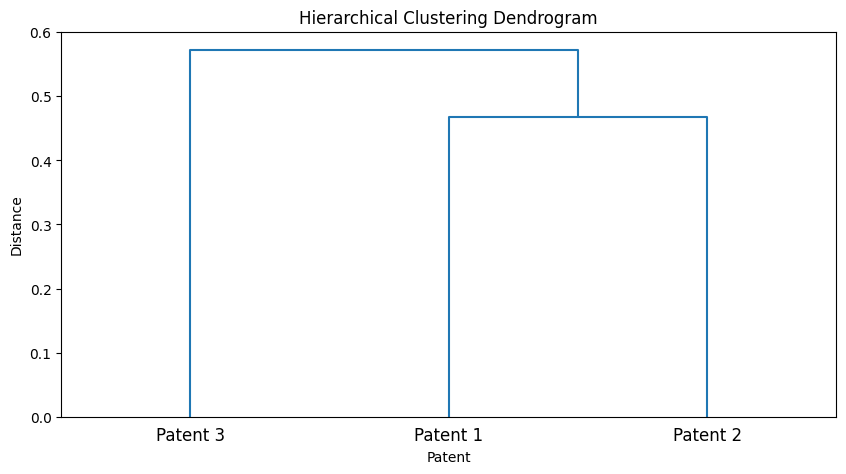

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(1 - cosine_sim, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=[f"Patent {i+1}" for i in range(len(labels))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patent')
plt.ylabel('Distance')
plt.show()

**Description**: *Visualizes the results of hierarchical clustering in a dendrogram. This plot helps to visually inspect the clustering process and understand the hierarchical structure of patent groupings.*

In [20]:
import spacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Process the patent texts
docs = [nlp(text) for text in patent_texts]

# Extract entities from each document
for i, doc in enumerate(docs, 1):
    print(f"Entities in Patent {i}:")
    for ent in doc.ents:
        print(f"{ent.text} ({ent.label_})")

Entities in Patent 1:
a United States National Stage Application (ORG)
under 35 (DATE)
U.S.C. (GPE)
371 (CARDINAL)
International Application No (ORG)
Jul. 24, 2012 (DATE)
U.S. Provisional Application No. 61/511,826 (ORG)
Jul. 26, 2011 (DATE)
One (CARDINAL)
one (CARDINAL)
between about 5 (CARDINAL)
about 100 (CARDINAL)
between about 20 (CARDINAL)
about 50 (CARDINAL)
between about 20 (CARDINAL)
about 40 (CARDINAL)
one (CARDINAL)
CuO (ORG)
one (CARDINAL)
CuO (ORG)
Catalyst (ORG)
one (CARDINAL)
CuO (ORG)
10 millimolar (QUANTITY)
about 150 (CARDINAL)
between about 10 (CARDINAL)
about 100 (CARDINAL)
between about 30 (CARDINAL)
about 50 (CARDINAL)
one (CARDINAL)
one (CARDINAL)
VLS (ORG)
one (CARDINAL)
between 2% and 20% (PERCENT)
one (CARDINAL)
CuO (ORG)
between about 5 (CARDINAL)
about 100 (CARDINAL)
between about 10 (CARDINAL)
about 100 (CARDINAL)
between about 20 (CARDINAL)
about 50 (CARDINAL)
between about 20 (CARDINAL)
about 40 (CARDINAL)
VLS (ORG)
10 millimolar (QUANTITY)
Cu+ (GPE)
PdCl

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a count vectorizer (LDA requires integer counts)
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(patent_texts)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(doc_term_matrix)

# Display topics
features = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([features[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0:
the of and in to or is bile about acid
Topic 1:
therefor brief many 266 national several replaced sheet illustrated novel
Topic 2:
the of and or about copper in to for is


# **7. Interactive Plot with Plotly**

In [22]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add a trace for each cluster
for i in range(len(labels)):
    fig.add_trace(go.Scatter(
        x=[cosine_sim[i][j] for j in range(len(cosine_sim))],
        y=[j for j in range(len(cosine_sim))],
        mode='markers',
        name=f'Patent {i+1}'
    ))

fig.update_layout(title='Cosine Similarity Interactive Plot',
                  xaxis_title='Document Index',
                  yaxis_title='Cosine Similarity')
fig.show()

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Example data for clustering (replace with your cosine similarity matrix)
data = np.random.rand(10, 4)

# Generate the linkage matrix
Z = linkage(data, method='average')

# Plotting the dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, labels=[f"Data {i+1}" for i in range(len(data))], ax=ax)
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Data Index')
ax.set_ylabel('Distance')

# Showing plot in Streamlit
st.pyplot(fig)

# Close the plot
plt.close(fig)

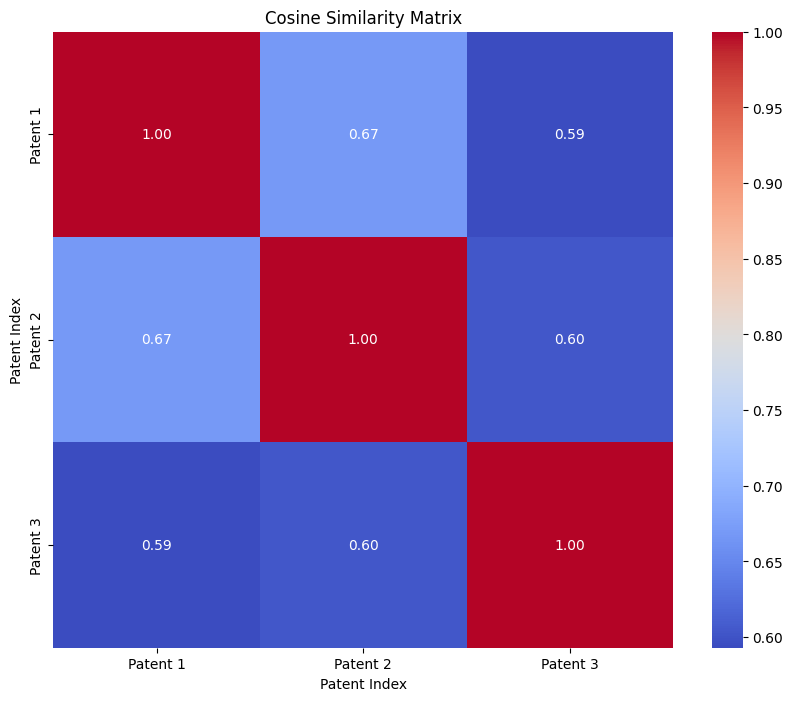

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=[f"Patent {i+1}" for i in range(cosine_sim.shape[0])],
            yticklabels=[f"Patent {i+1}" for i in range(cosine_sim.shape[0])])
plt.title('Cosine Similarity Matrix')
plt.xlabel('Patent Index')
plt.ylabel('Patent Index')
plt.show()

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=cosine_sim,
                   x=[f"Patent {i+1}" for i in range(cosine_sim.shape[0])],
                   y=[f"Patent {i+1}" for i in range(cosine_sim.shape[0])],
                   hoverongaps=False,
                   colorscale='Viridis'))
fig.update_layout(title='Cosine Similarity Matrix', xaxis_title='Patent Index', yaxis_title='Patent Index')
fig.show()

In [31]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Assuming you have a variable `cosine_sim` that stores the cosine similarity matrix.
# Convert the similarity to a distance measure
distance_matrix = 1 - cosine_sim

# Generate the linkage matrix for clustering
Z = linkage(distance_matrix, 'average')

# Create a matplotlib figure for the dendrogram
fig_dendrogram, ax = plt.subplots(figsize=(12, 8))
dendrogram(Z, labels=[f"Patent {i+1}" for i in range(cosine_sim.shape[0])], ax=ax)
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Patent Index')
ax.set_ylabel('Distance')

<ipython-input-31-6cdf236842e3>:10: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



Text(0, 0.5, 'Distance')

In [32]:
import streamlit as st

st.title('AI4Legal: Patent Analysis Dashboard')

# Make sure you generate your figures before calling them in Streamlit
st.subheader('Hierarchical Clustering Dendrogram')
st.pyplot(fig_dendrogram)

DeltaGenerator()

In [34]:
import plotly.graph_objects as go
import networkx as nx

# Create a sample graph
G = nx.random_geometric_graph(10, 0.5)

# Position the nodes based on a layout
pos = nx.spring_layout(G)

# Draw nodes and edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        line=dict(color='black', width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Create a plot
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: https://plotly.com/python/network-graphs/",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()